In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

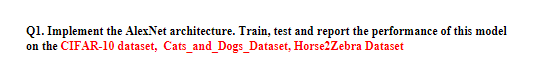

***Cats_and_Dogs***

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-20 17:11:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.16, 172.253.115.128, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   166MB/s    in 0.4s    

2022-08-20 17:11:32 (166 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [8]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

In [10]:
model.compile(loss ='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [11]:
history = model.fit( train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 25s 128ms/step - loss: 2.3661 - acc: 0.5615 - val_loss: 1.9736 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 10s 102ms/step - loss: 1.6383 - acc: 0.5905 - val_loss: 1.0164 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 12s 117ms/step - loss: 1.2630 - acc: 0.6250 - val_loss: 1.1326 - val_acc: 0.5040
Epoch 4/10
100/100 [==============================] - 11s 105ms/step - loss: 1.0284 - acc: 0.6390 - val_loss: 1.0092 - val_acc: 0.5210
Epoch 5/10
100/100 [==============================] - 10s 102ms/step - loss: 0.9089 - acc: 0.6690 - val_loss: 0.7379 - val_acc: 0.6110
Epoch 6/10
100/100 [==============================] - 10s 102ms/step - loss: 0.7756 - acc: 0.6915 - val_loss: 0.8251 - val_acc: 0.6280
Epoch 7/10
100/100 [==============================] - 10s 102ms/step - loss: 0.6835 - acc: 0.7150 - val_loss: 0.6211 - val_acc: 0.6890
Epoch 8/10
100/100 [==============================] - 1

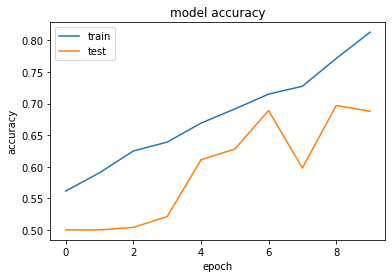

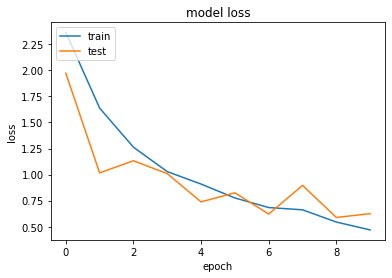

In [12]:
#plot for model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot for model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The performance of AlexNet architecture on Cats_and_Dogs dataset is not particulary good with an accuracy of around 62%. 
One reason for this maybe low number of training data.
The performance on the Cats_and_dogs dataset can be improved by further tuning the parameters like epoch and learning rate.

**Horse2Zebra** 

In [14]:
import os
import zipfile

if not os.path.exists('./horse2zebra'):
  import gdown
  url = 'https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg'
  gdown.download(url, './horse2zebra.zip', quiet=False)
  !unzip ./horse2zebra.zip > /dev/null

Downloading...
From: https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg
To: /content/horse2zebra.zip
100%|██████████| 117M/117M [00:00<00:00, 294MB/s] 


In [15]:
import PIL.Image as Image
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/train/A'):
        filenames_horses=files
    if root.endswith('/train/B'):
        filenames_zebras=files

filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/train/A'
zebras_root='./horse2zebra/train/B'

horses_train=[]
zebras_train=[]

for i in range(len(filenames_horses_sort)):
          horses_train.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_train.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

train_dir = './horse2zebra/train'

In [16]:
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/test/A'):
        filenames_horses=files
    if root.endswith('/test/B'):
        filenames_zebras=files

#Sort filenames
filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/test/A'
zebras_root='./horse2zebra/test/B'

horses_test=[]
zebras_test=[]

#Save all images
for i in range(len(filenames_horses_sort)):
          horses_test.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_test.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

test_dir = './horse2zebra/test'

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [19]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [20]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

In [21]:
model2.compile(loss ='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [22]:
history2 = model2.fit( train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 10s 94ms/step - loss: 1.3177 - acc: 0.7740 - val_loss: 3.9549 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 9s 93ms/step - loss: 0.7202 - acc: 0.8390 - val_loss: 1.5489 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 9s 92ms/step - loss: 0.6309 - acc: 0.8642 - val_loss: 2.7314 - val_acc: 0.4990
Epoch 4/10
100/100 [==============================] - 10s 97ms/step - loss: 0.4781 - acc: 0.8824 - val_loss: 1.8139 - val_acc: 0.5010
Epoch 5/10
100/100 [==============================] - 9s 91ms/step - loss: 0.3703 - acc: 0.9021 - val_loss: 1.8182 - val_acc: 0.5130
Epoch 6/10
100/100 [==============================] - 9s 90ms/step - loss: 0.6303 - acc: 0.8627 - val_loss: 2.0883 - val_acc: 0.4910
Epoch 7/10
100/100 [==============================] - 9s 90ms/step - loss: 0.4506 - acc: 0.8945 - val_loss: 7.0834 - val_acc: 0.4920
Epoch 8/10
100/100 [==============================] - 9s 90ms/step 

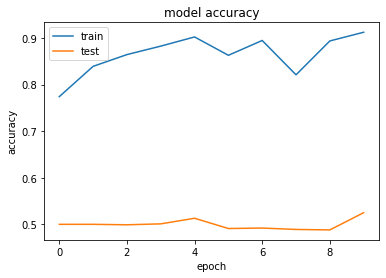

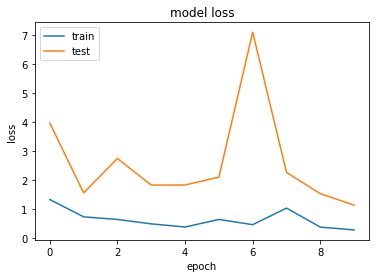

In [23]:
#plot for model accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot for model loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The performance of AlexNet architecture on Horse2Zebra dataset is not particulary good with an accuracy of around 63%. One reason for this maybe low number of training data. The performance on the Horse2Zebra dataset can be improved by further tuning the parameters like epoch and learning rate.
AlexNet performs slightly better on Horse2Zebra Dataset compared to Cats_and_Dogs dataset

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# # All images will be rescaled by 1./255
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# base_dir = '/tmp/cats_and_dogs_filtered'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')

# # Directory with our training cat pictures
# train_cats_dir = os.path.join(train_dir, 'cats')

# # Directory with our training dog pictures
# train_dogs_dir = os.path.join(train_dir, 'dogs')

# # Directory with our validation cat pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')

# # Directory with our validation dog pictures
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# # Flow training images in batches of 20 using train_datagen generator
# train_generator = train_datagen.flow_from_directory(
#         train_dir,  # This is the source directory for training images
#         target_size=(224, 224),  # All images will be resized to 224x224
#         batch_size=20,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
# # Flow validation images in batches of 20 using val_datagen generator
# validation_generator = val_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(224, 224),
#         batch_size=20,
#         class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
# train_cat_fnames = os.listdir(train_cats_dir)
# print(train_cat_fnames[:10])

# train_dog_fnames = os.listdir(train_dogs_dir)
# train_dog_fnames.sort()
# print(train_dog_fnames[:10])

['cat.396.jpg', 'cat.486.jpg', 'cat.854.jpg', 'cat.121.jpg', 'cat.267.jpg', 'cat.791.jpg', 'cat.397.jpg', 'cat.297.jpg', 'cat.6.jpg', 'cat.953.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


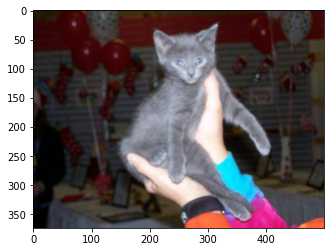

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

In [ ]:
# train_cat_fnames = os.listdir(train_cats_dir)

# train_dog_fnames = os.listdir(train_dogs_dir)



# import matplotlib.pyplot as plt

# import matplotlib.image as mpimg



# f = plt.figure(figsize=(25,25))

# n=100

# for i in range(n):

#         # Debug, plot figure

#         f.add_subplot(10,10, i + 1)

#         plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[i])))

#         #plt.imshow(mpimg.imread(os.path.join(train_dogs_dir, train_dog_fnames[i])))



# plt.show(block=True)